<a href="https://colab.research.google.com/github/Juhyeon-creater/Sessac-miniproject/blob/main/hundred-pose-yolo-pelvis-correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


-----------------------------------
Correlation Analysis Result
-----------------------------------
1) YOLO Angle ↔ Pelvis Roll Diff : -0.534
2) YOLO BAD ↔ Pelvis Down        : (컬럼 없음 / 계산 불가)
-----------------------------------


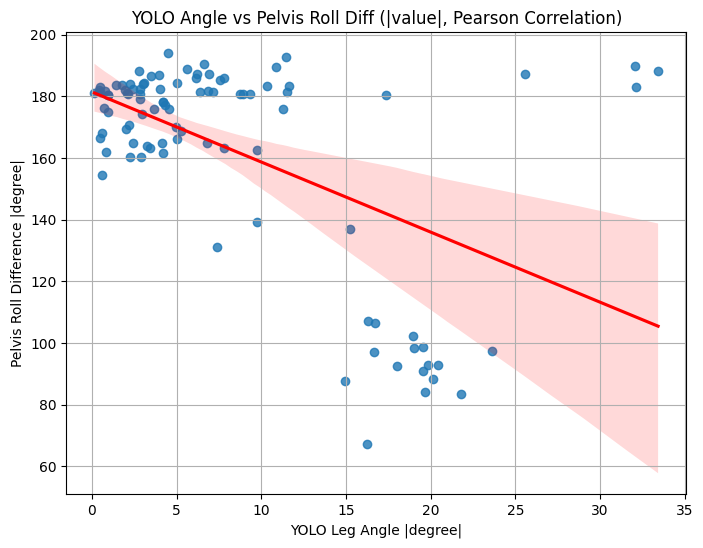

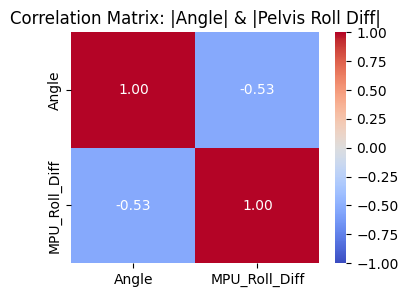

In [4]:
# -------------------------------------------------
# Hundred, Mermaid 분석 스크립트
#    - YOLO Angle ↔ Pelvis Roll Diff 상관계수 분석
#    - Pelvis Down ↔ YOLO Bad 분류 상관관계
#    - 포트폴리오 제출용 코드 (주석 상세)
# -------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------------------------
# 1. CSV 로드
# --------------------------------------------
csv_path = "/content/drive/MyDrive/shared_googledrive(Sessac Final Project)/video/머메이드/HJ_Hundred_20251120 편집 - HJ_Hundred_Mermaid_20251120.csv"
df = pd.read_csv(csv_path)

# --------------------------------------------
# 2. 결측 처리 (Pelvis/YOLO 핵심 데이터 없는 행 제거)
#    - 회귀형 상관: MPU_Roll_Diff, Angle
#    - 이진 상관: YOLO_Bad, Pelvis_Down
# --------------------------------------------
df = df.dropna(subset=["MPU_Roll_Diff", "Angle"])
# 필요하다면 이진 상관용 결측도 같이 제거
# df = df.dropna(subset=["MPU_Roll_Diff", "Angle", "YOLO_Bad", "Pelvis_Down"])

# --------------------------------------------
# 3. 절댓값 적용 (각도는 방향보다 크기 위주로 분석)
# --------------------------------------------
df["MPU_Roll_Diff"] = df["MPU_Roll_Diff"].abs()
df["Angle"] = df["Angle"].abs()

# --------------------------------------------
# 4. 핵심 상관관계 분석
#    (1) YOLO Angle ↔ Pelvis Roll Diff  : 연속형 상관 (피어슨)
#    (2) YOLO BAD ↔ Pelvis Down         : 이진/이진 상관 (피어슨 = 피어슨 phi)
# --------------------------------------------

# (1) 연속형 상관
corr_angle = df["Angle"].corr(df["MPU_Roll_Diff"])

# (2) 이진 상관 (컬럼이 있는 경우에만 계산)
corr_binary = None
if {"YOLO_Bad", "Pelvis_Down"}.issubset(df.columns):
    # 이진 상관은 NaN 제거 후 계산
    tmp = df.dropna(subset=["YOLO_Bad", "Pelvis_Down"])
    corr_binary = tmp["YOLO_Bad"].corr(tmp["Pelvis_Down"])

print("-----------------------------------")
print("Correlation Analysis Result")
print("-----------------------------------")
print(f"1) YOLO Angle ↔ Pelvis Roll Diff : {corr_angle:.3f}")

if corr_binary is not None:
    print(f"2) YOLO BAD ↔ Pelvis Down        : {corr_binary:.3f}")
else:
    print("2) YOLO BAD ↔ Pelvis Down        : (컬럼 없음 / 계산 불가)")
print("-----------------------------------")

# --------------------------------------------
# 5. 시각화 (포트폴리오용)
# --------------------------------------------

# 5-1) Angle vs Pelvis Diff 산점도 + 회귀선
plt.figure(figsize=(8, 6))
sns.regplot(x=df["Angle"],
            y=df["MPU_Roll_Diff"],
            line_kws={"color": "red"})
plt.title("YOLO Angle vs Pelvis Roll Diff (|value|, Pearson Correlation)")
plt.xlabel("YOLO Leg Angle |degree|")
plt.ylabel("Pelvis Roll Difference |degree|")
plt.grid(True)
plt.show()

# 5-2) 상관계수 히트맵 (연속형 2변수)
corr_mat = df[["Angle", "MPU_Roll_Diff"]].corr()
plt.figure(figsize=(4, 3))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Matrix: |Angle| & |Pelvis Roll Diff|")
plt.show()
